# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [9]:
# import dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import tweepy
import json
import warnings
warnings.simplefilter(action='ignore')


In [10]:
df_tweeter_archive= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [11]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name= 'image_predictions.tsv' 

response= requests.get(url) 

with open(file_name, 'wb') as file:
    file.write(response.content)

df_image= pd.read_csv('image_predictions.tsv', sep= '\t')
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
fav_list= []
rt_list= []
failed_ids= []
attempt= 0

with open('tweet_json.txt', 'w') as file:
    for i in df_twit['tweet_id']:
        try:
            api.get_status(i).favorite_count
        except Exception:
            failed_ids.append(i)
            print(attempt, "= Failed")
            attempt+= 1
        else:
            file.write(json.dumps(api.get_status(i, tweet_mode= 'extended')._json)+'\n')
            print(attempt, "= Successful")
            attempt+= 1

In [ ]:
len(failed_id)

In [ ]:
len(df_twit['tweet_id'])

In [74]:
# Reading the tweet_json.txt as a list to create a dataframe
with open('tweet_json.txt', 'r') as file:
    json_list= []
    for line in file:
        json_list.append(json.loads(line))

In [75]:
df_json= pd.DataFrame(json_list)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual assessment

In [76]:
df_tweeter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1324,706169069255446529,NaN,NaN,2016-03-05 17:26:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was doing his best. 12/10 I'll be his lawye...,NaN,NaN,NaN,https://twitter.com/wgnnews/status/70616592080...,12,10,None,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
1791,677335745548390400,NaN,NaN,2015-12-17 03:53:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,NaN,NaN,NaN,https://vine.co/v/hbLbH77Ar67,12,10,None,None,None,None,None
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She doesn't understand flowers. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304...,12,10,Ava,None,None,None,None
1375,701889187134500865,NaN,NaN,2016-02-22 21:59:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bilbo. He's not emotionally prepared t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701889187...,11,10,Bilbo,None,None,None,None


In [77]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
464,675003128568291329,https://pbs.twimg.com/media/CV4XwYiWoAAHQIF.jpg,1,Pembroke,0.655279,True,Pomeranian,0.104164,True,Cardigan,0.052818,True
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True


In [78]:
df_json.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
438,None,None,Mon Jan 09 00:53:55 +0000 2017,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 818259456588812288, 'id_str'...",10423,False,This is Florence. He saw the same snap you sen...,None,...,NaN,NaN,NaN,NaN,2088,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
601,None,None,Tue Nov 08 20:00:55 +0000 2016,"[0, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 796080068686737408, 'id_str'...",8024,False,This is Yogi. He's 98% floof. Snuggable af. 12...,None,...,NaN,NaN,NaN,NaN,2170,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1418,None,None,Mon Feb 08 00:20:23 +0000 2016,"[0, 46]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696488707105386500, 'id_str'...",2320,False,12/10 revolutionary af https://t.co/zKzq4nIY86,None,...,NaN,NaN,NaN,NaN,930,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1123,None,None,Thu Apr 28 20:40:11 +0000 2016,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 725786708017553410, 'id_str'...",3853,False,Say hello to Lillie. She's a Rutabagan Floofem...,None,...,NaN,NaN,NaN,NaN,1250,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1053,None,None,Sat Jun 04 00:01:35 +0000 2016,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 738883339164192768, 'id_str'...",3051,False,When a single soap orb changes your entire per...,None,...,NaN,NaN,NaN,NaN,723,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Programatic Assessment

In [79]:
# Checking information about the columnsin each dataset using the dataframe.info() method
# Tweeter Archive dataset

df_tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
# Checking unique values of each column the dataset
# tweet_achive

for i in df_tweeter_archive.columns:
    print(i, ':', df_tweeter_archive[i].unique(), '\n')

tweet_id : [892420643555336193 892177421306343426 891815181378084864 ...,
 666033412701032449 666029285002620928 666020888022790149] 

in_reply_to_status_id : [             nan   8.86266357e+17   8.81607037e+17   8.79553827e+17
   8.70726203e+17   8.63425646e+17   6.67152164e+17   8.57156678e+17
   8.55818117e+17   8.56286004e+17   8.55861584e+17   8.55858536e+17
   8.50328819e+17   8.48212112e+17   8.47606176e+17   7.59099524e+17
   8.40698300e+17   8.38145499e+17   8.38085539e+17   8.35245984e+17
   8.32087548e+17   8.31903044e+17   8.26598365e+17   8.23326389e+17
   8.21152593e+17   8.13127252e+17   8.11627233e+17   7.33109485e+17
   8.01854331e+17   8.00857954e+17   7.97123751e+17   7.72743019e+17
   7.66711819e+17   7.63865175e+17   7.50180499e+17   7.47648654e+17
   7.46885919e+17   6.91416866e+17   7.38411920e+17   7.29113531e+17
   7.07980066e+17   7.03255936e+17   7.04485745e+17   7.03041950e+17
   6.96488711e+17   6.75349384e+17   6.70668383e+17   6.93642232e+17
   6.93572216

In [81]:
df_tweeter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [82]:
df_tweeter_archive.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [83]:
df_tweeter_archive[df_tweeter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [84]:
# Checking information about the columnsin each dataset using the dataframe.info() method
# image-predictions dataset

df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [85]:
# Checking unique values of each column the dataset
# image_predictions

for i in df_image.columns:
    print(i, ':', df_image[i].unique(), '\n')

tweet_id : [666020888022790149 666029285002620928 666033412701032449 ...,
 891815181378084864 892177421306343426 892420643555336193] 

jpg_url : ['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'
 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg'
 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg' ...,
 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg'
 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg'
 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'] 

img_num : [1 4 2 3] 

p1 : ['Welsh_springer_spaniel' 'redbone' 'German_shepherd' 'Rhodesian_ridgeback'
 'miniature_pinscher' 'Bernese_mountain_dog' 'box_turtle' 'chow'
 'shopping_cart' 'miniature_poodle' 'golden_retriever' 'Gordon_setter'
 'Walker_hound' 'pug' 'bloodhound' 'Lhasa' 'English_setter' 'hen'
 'desktop_computer' 'Italian_greyhound' 'Maltese_dog' 'three-toed_sloth'
 'ox' 'malamute' 'guinea_pig' 'soft-coated_wheaten_terrier' 'Chihuahua'
 'black-and-tan_coonhound' 'coho' 'toy_terrier' 'Blenheim_spaniel'
 'Pembroke' 'llama' 'Che

In [86]:
df_image.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [87]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [88]:
df_image[df_image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [118]:
# Checking information about the columnsin each dataset using the dataframe.info() method
# tweet_json dataset

df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2326 non-null object
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null object
id                               2326 non-null int64
id_str                           2326 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [90]:
df_json.isna().sum()

contributors                     2326
coordinates                      2326
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 270
favorite_count                      0
favorited                           0
full_text                           0
geo                              2326
id                                  0
id_str                              0
in_reply_to_screen_name          2249
in_reply_to_status_id            2249
in_reply_to_status_id_str        2249
in_reply_to_user_id              2249
in_reply_to_user_id_str          2249
is_quote_status                     0
lang                                0
place                            2325
possibly_sensitive                132
possibly_sensitive_appealable     132
quoted_status                    2302
quoted_status_id                 2300
quoted_status_id_str             2300
quoted_status_permalink          2300
retweet_coun

In [91]:
df_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2326.000000,2.326000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2326.000000
mean,7058.122098,7.417607e+17,7.440692e+17,2.040329e+16,8.113972e+17,2470.864574
std,10965.150273,6.820485e+16,7.524295e+16,1.260797e+17,6.295843e+16,4186.413224
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1228.250000,6.780814e+17,6.757073e+17,3.589728e+08,7.761338e+17,494.250000
50%,3050.500000,7.178159e+17,7.032559e+17,4.196984e+09,8.281173e+17,1148.500000
75%,8610.000000,7.986402e+17,8.233264e+17,4.196984e+09,8.637581e+17,2858.750000
max,144904.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,70751.000000


In [92]:
df_json[df_json['id'].duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


### Quality issues
1. Source column in the tweeter arcive dataset appears to have some html anchor tags

2. Time_stamp column in the tweeter archive dataset is captured as stings

3. Non-descriptive column names in the image predictions data

4. The retweeted_status_id column in the tweeter archive dataset contains 181 non-null values indicating the existence of retweets in the dataset 

5. Created at column in the json_ dataset is captured as stings

6. Rating denominator which should contain only a unique value of 10, cotains other values

7. Prediction columns in the image_predictions dataset contains values in both upper and lowercase

8. The tweeter archive dataset contains data beyond the cut off date of 1st August, 2017

9. Image predictions contains non descriptive column names

### Tidiness issues
1. Entities and extended entities columns in the tweet_json data have more than one feature 

2. Dog stages are shown in multiple column although the observe thesame variable.

3. Dog rating shown as seperate entites of numerator and denominator.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [119]:
# Make copies of original pieces of data
tweet_df= df_tweeter_archive.copy()
image_df= df_image.copy()
json_df= df_json.copy()

In [120]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2326 non-null object
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null object
id                               2326 non-null int64
id_str                           2326 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [122]:
json_df.columns= ['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user']

### Issue #1: Source column in the tweeter_achive dataset appears to have some html anchor tags

#### Define: since each observation follows similar convention I will slice out the relevant portion of each entry in the source column of the tweeter_achive dataset and reassign it to itself

#### Code

In [123]:
tweet_df['source']= tweet_df['source'].str[len('<a href="'):-len('" rel="nofollow">Twitter for iPhone</a>')]


#### Test

In [124]:
tweet_df['source'].head(2)

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #2: Time_stamp column in the tweeter archive dataset is captured as stings

#### Define

I will reassign a converted column of the time_stamp column to itself

#### Code

In [125]:
tweet_df['timestamp']= tweet_df['timestamp'].astype('datetime64')

#### Test

In [126]:
tweet_df[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2356 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


### Issue #3: Non-descriptive column names in the image predictions data

#### Define

I will reassign a list of descriptive names to the image_df.columns to change all the column names to those in the list.

In [127]:
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [128]:
# list of discriptive columns names
column_names= ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'p1_confidence', 
               'is_prediction_1_dog?', 'prediction_2', 'p2_confidence', 
               'is_prediction_2_dog?', 'prediction_3', 'p3_confidence', 'is_prediction_3_dog?']

# reassigning column names
image_df.columns= column_names

#### Test

In [129]:
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'p1_confidence',
       'is_prediction_1_dog?', 'prediction_2', 'p2_confidence',
       'is_prediction_2_dog?', 'prediction_3', 'p3_confidence',
       'is_prediction_3_dog?'],
      dtype='object')

### Issue #4: The retweeted_status_id column in the tweeter archive dataset contains 181 non-null values indicating the existence of retweets in the dataset 

#### Define

I will first create a list of all ids in the retweeted status id and then drop rows containing those ids

#### Code

In [130]:
# creating a list of all ids in the retweetded_status_id column in the tweets_df
id_list= tweet_df['retweeted_status_id'].unique()[1:]

# droping the rows by the retweet_id
for i in id_list:
    tweet_df.drop(tweet_df.index[tweet_df['retweeted_status_id']== i], axis=0, inplace=True)

#### Test

In [131]:
# Using a .unique() method on the retweeted_status_id to check if any id 
#     id remains that column

tweet_df['retweeted_status_id'].unique()

array([ nan])

### Issue #5: Created at column in the json_ dataset is captured as stings

#### Define

I will use the .astype() method to convert to datetime64

In [132]:
json_df['created_at']= json_df['created_at'].astype('datetime64')

#### Test

In [133]:
json_df[['created_at']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 1 columns):
created_at    2326 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.2 KB


### #6: Rating_denominator in the tweet data set  which should contain only a unique value of 10, cotains other values

#### Define:

I will simpy reassing all cells in the column to the integer 10

In [134]:
tweet_df['rating_denominator']= 10

#### Test

In [135]:
tweet_df['rating_denominator'].unique()

array([10])

### #7: Prediction columns in the image_predictions dataset contains values in both upper and lowercase

#### Define

i will use the string method of the pandas dataframe to change all strings in all predictions to lower case 


In [136]:
pred_col= ['prediction_1', 'prediction_2', 'prediction_3']

In [137]:
for col_name in pred_col:
    image_df[col_name]= image_df[col_name].str.lower()

#### Test

In [138]:
for col_name in pred_col: # loops through all prediction columns of the image prediction df
    for each_value in image_df[col_name]: # loops through every value in the column
        if not each_value.islower(): # check to see if any text in the columns is not in lower case
            print(each_value, 'not lower') # will print out the value for further analysis, nothing willl be printed if all is lower

### #8: The tweeter archive dataset contains data beyond the cut off date of 1st August, 2017

#### Define

I will be dropping the rows of all dates beyond the cut-off period by using the index of a masked dataframe of the timestamp column greater than or equals to August 1, 2017

In [139]:
tweet_df.drop(tweet_df.index[tweet_df['timestamp']>= '2017-08-01'], axis=0, inplace=True)

#### Test

In [140]:
tweet_df.sort_values('timestamp', ascending=False).head() # this sorts by most recent date in the dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


### #9: Entities and extended entities columns in the tweet_json data have more than one feature- nested dictionaries

#### Define

As I will not be requiring both columns, I will drop them 

#### Code

In [141]:
json_df.drop(['entities', 'extended_entities'], axis=1, inplace=True)

#### Test

In [142]:
del_col= ['entities', 'extended_entities']

for i in del_col:
    if i in json_df.columns:
        print(i, True)

### #10: Dog stages are shown in multiple column although the observe thesame variable

#### Define

I will be merging the columns into one column called dog_stages by replacing none in the respective columns with empty string and the concatenating the columns into a new column called dog_stage

#### Code

In [143]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null object
tweet_id                         2326 non-null int64
id_str                           2326 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2326 non-null bool
lang                             2326 non-nu

In [144]:
tweet_df.replace('None', '', inplace= True)

In [145]:
tweet_df['dog_stage']= tweet_df['doggo'] + tweet_df['pupper'] + \
                        tweet_df['puppo'] + tweet_df['floofer']

In [146]:
tweet_df['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [147]:
tweet_df.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis= 1, inplace=True)

#### Test

In [148]:
tweet_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,


### #11: Dog rating shown as seperate entites of numerator and denominator.

#### Define:

I will be creating a new column called rating which is a float of the dog ratings


#### Code

In [149]:
tweet_df['dog_ratings']= tweet_df['rating_numerator']/tweet_df['rating_denominator']

In [150]:
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_ratings
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,,,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,,,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,1.4
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,http://twitter.com/download/iphone,This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,,1.3
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,http://twitter.com/download/iphone,This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,,1.3


#### Test

In [151]:
tweet_df['dog_ratings']

2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
20      1.2
21      1.3
22      1.4
23      1.3
24      1.3
25      1.2
26      1.3
27      1.3
28      1.3
29      1.2
30      1.2
31      1.3
33      1.2
       ... 
2326    0.2
2327    0.7
2328    0.9
2329    1.1
2330    0.6
2331    0.8
2332    1.0
2333    0.9
2334    0.3
2335    0.1
2336    1.1
2337    1.0
2338    0.1
2339    1.1
2340    0.8
2341    0.9
2342    0.6
2343    1.0
2344    0.9
2345    1.0
2346    0.8
2347    0.9
2348    1.0
2349    0.2
2350    1.0
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: dog_ratings, Length: 2173, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [152]:
# I will first delete all columns relating to retweets in the dataset

tweet_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator'], axis=1, inplace=True)

In [153]:
json_df.drop(['retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id', 'user', 'geo', 'contributors',
       'coordinates', 'place', 'in_reply_to_user_id_str', 'in_reply_to_screen_name'], axis=1, inplace=True)

#### Merging

In [154]:
twitter_archive_master=pd.merge(pd.merge(tweet_df, image_df, on='tweet_id'), json_df, on='tweet_id')

In [155]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [156]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 32 columns):
tweet_id                         1984 non-null int64
timestamp                        1984 non-null datetime64[ns]
source_x                         1984 non-null object
text                             1984 non-null object
name                             1984 non-null object
dog_stage                        1984 non-null object
dog_ratings                      1984 non-null float64
jpg_url                          1984 non-null object
img_num                          1984 non-null int64
prediction_1                     1984 non-null object
p1_confidence                    1984 non-null float64
is_prediction_1_dog?             1984 non-null bool
prediction_2                     1984 non-null object
p2_confidence                    1984 non-null float64
is_prediction_2_dog?             1984 non-null bool
prediction_3                     1984 non-null object
p3_confidence           

In [157]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 32 columns):
tweet_id                         1984 non-null int64
timestamp                        1984 non-null datetime64[ns]
source_x                         1984 non-null object
text                             1984 non-null object
name                             1984 non-null object
dog_stage                        1984 non-null object
dog_ratings                      1984 non-null float64
jpg_url                          1984 non-null object
img_num                          1984 non-null int64
prediction_1                     1984 non-null object
p1_confidence                    1984 non-null float64
is_prediction_1_dog?             1984 non-null bool
prediction_2                     1984 non-null object
p2_confidence                    1984 non-null float64
is_prediction_2_dog?             1984 non-null bool
prediction_3                     1984 non-null object
p3_confidence           

### Insights:

1. What is the favorite dog_stage?

2. What is the dog breed has the best ratings?

3. What are the most common dog name?

4. What kind of relationship exists between favorite count and retweet count?

5. What breeds of dogs have the highest ratings

#### #1: What is the favorite dog_stage

In [158]:
# 1: Favorite count 
# Group by dog_stage and sum the favorite_count

dog_stage_fav= twitter_archive_master.groupby('dog_stage').sum()[['favorite_count']].reset_index().sort_values('favorite_count', ascending=False)[1:]

In [159]:
dog_stage_fav

,dog_stage,favorite_count
6,pupper,1259797.0
1,doggo,1091473.0
7,puppo,430661.0
3,doggopupper,108357.0
5,floofer,78582.0
4,doggopuppo,41919.0
2,doggofloofer,14846.0


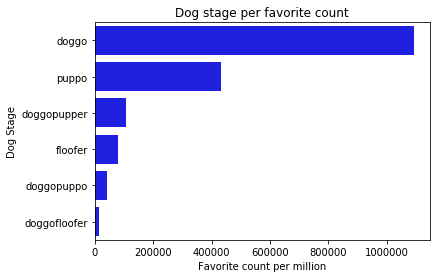

In [160]:
sns.barplot(y='dog_stage', x= 'favorite_count', data= dog_stage_fav.iloc[1:, :], color='blue')
plt.title('Dog stage per favorite count')
plt.xlabel('Favorite count per million')
plt.ylabel('Dog Stage')
plt.show()

#### #2: What is the dog breed has the best ratings

In [161]:
# to create single column of best predictions breed

twitter_archive_master['dog_breed']= 'None'

for i in range(len(twitter_archive_master)):
    if twitter_archive_master['is_prediction_1_dog?'][i]== True:
        twitter_archive_master['dog_breed'][i]= twitter_archive_master['prediction_1'][i]
    elif twitter_archive_master['is_prediction_2_dog?'][i]== True:
        twitter_archive_master['dog_breed'][i]= twitter_archive_master['prediction_2'][i]
    elif twitter_archive_master['is_prediction_3_dog?'][i]== True:
        twitter_archive_master['dog_breed'][i]= twitter_archive_master['prediction_3'][i]
    else:
        twitter_archive_master['dog_breed'][i]= 'None'

In [163]:
dog_breed_fav= twitter_archive_master.groupby('dog_breed').sum()[['favorite_count']].reset_index().sort_values('favorite_count', ascending=False)

In [164]:
dog_breed_fav= dog_breed_fav.iloc[0:12, :].sort_values('favorite_count', ascending= False)

In [165]:
dog_breed_fav

,dog_breed,favorite_count
0,None,1855044.0
46,golden_retriever,1688502.0
63,labrador_retriever,1039755.0
81,pembroke,905941.0
28,chihuahua,640138.0
42,french_bulldog,526239.0
89,samoyed,482188.0
29,chow,389611.0
31,cocker_spaniel,352270.0
83,pug,325451.0


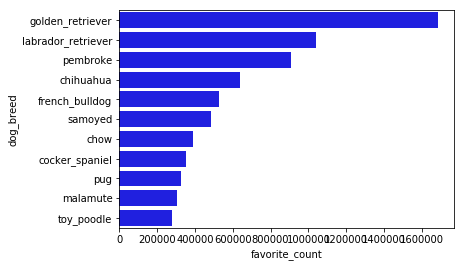

In [166]:
sns.barplot(y= 'dog_breed', x= 'favorite_count', data= dog_breed_fav.iloc[1:, :], color= 'blue')
plt.show()

#### #3: What are the most common dog names

In [168]:
# converting to lowercase to ensure names are no divided by string case
twitter_archive_master['name']= twitter_archive_master['name'].str.lower()
name_df= twitter_archive_master.groupby('name').count()[['tweet_id']].reset_index().sort_values('tweet_id', ascending=False)
name_df.head(20)

,name,tweet_id
0,,545
1,a,55
638,oliver,10
208,cooper,10
170,charlie,10
664,penny,9
885,tucker,9
544,lucy,9
750,sadie,8
919,winston,8


### Visualization

#### #4: What kind of relationship exists between favorite count and retweet count?

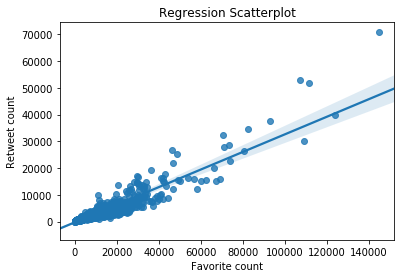

In [169]:
# Visualizing a scatterplot to show the relationship between favourite and likes
import warnings
warnings.simplefilter(action='ignore')

sns.regplot('favorite_count', 'retweet_count', data= twitter_archive_master)
plt.title('Regression Scatterplot')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
plt.show()

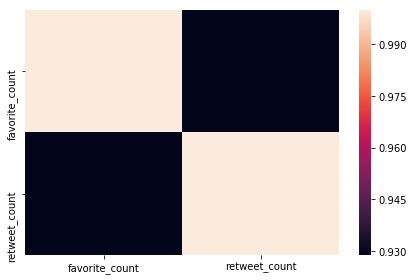

In [171]:
sns.heatmap(twitter_archive_master[['favorite_count', 'retweet_count']].corr())
plt.tight_layout()

    There is a strong positive correlation between retweet_count and favorite_count

#### #5: Top 20 best rated Dog breeds

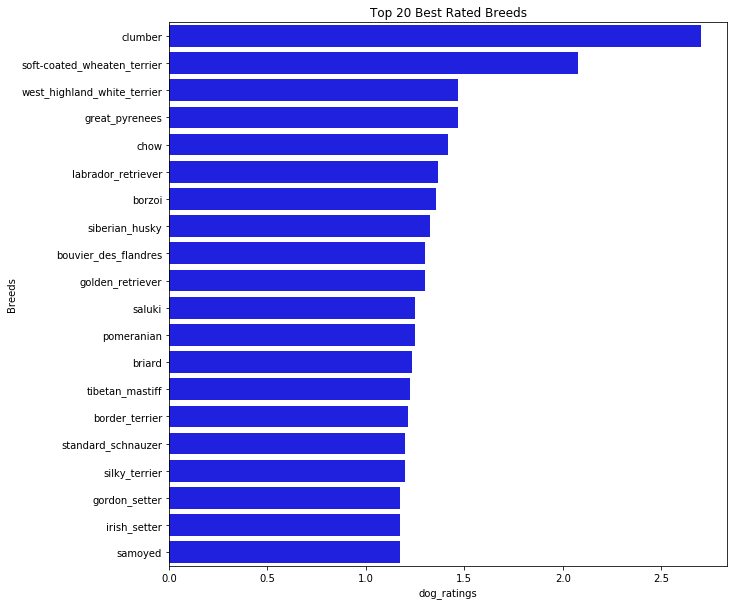

In [172]:
breed_ratings= twitter_archive_master.groupby('dog_breed').mean()[['dog_ratings']].reset_index().sort_values('dog_ratings', ascending=False)

fig, axes= plt.subplots(figsize=(10,10))
sns.barplot(y='dog_breed', x='dog_ratings', data=breed_ratings[breed_ratings['dog_breed']!= 'None'][:20], color= 'blue')
plt.title('Top 20 Best Rated Breeds')
plt.ylabel('Breeds')
plt.show()